## Model Development and Evaluation

- The **goal** is to create a model that assigns probabilities to economic states occuring one day forward, the probabilities will be used to weight CVaR and VaR calculations based on portfolio returns from those periods...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
# Model Development for K Means (clusters 3) for Fractionally Differenced KNN Imputed Data Frame

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

fd_knn_daily_df.loc[:, numeric_cols] = fd_knn_daily_df[numeric_cols].shift(1) # Forecast the state one day forward
fd_knn_5yr_daily_df = fd_knn_daily_df.dropna()

X = fd_knn_5yr_daily_df[numeric_cols]
y = fd_knn_5yr_daily_df['state']

minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, shuffle=False, random_state=42)

log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)

print(f"Test accuracy: {log_reg.score(X_test, y_test):.4f}")

NameError: name 'fd_knn_daily_df' is not defined

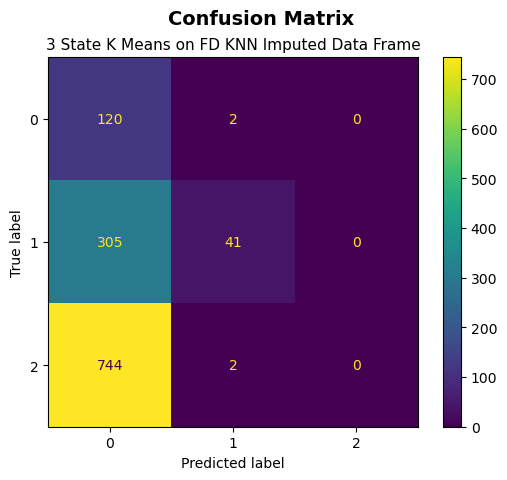

In [ ]:
# Model evaluation for K Means (clusters 3) for Fractionally Differenced KNN Imputed Data Frame

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

disp.plot()
plt.suptitle("Confusion Matrix", fontweight='bold', fontsize=14)
plt.title("3 State K Means on FD KNN Imputed Data Frame", fontsize=11)
plt.show()

In [ ]:
# Model Comparison for K Means (clusters 3) for Fractionally Differenced KNN Imputed Data Frame

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Log loss': log_loss(y_test, y_pred_proba),
    }

for name, metrics in results.items():
    print(f"{name}:\n  Accuracy: {metrics['Accuracy']:.4f}\n  Log Loss: {metrics['Log loss']:.4f}")
    print('---'*12)

Logistic Regression:
  Accuracy: 0.1326
  Log Loss: 2.5414
------------------------------------
Random Forest:
  Accuracy: 0.2290
  Log Loss: 1.8280
------------------------------------
Gradient Boosting:
  Accuracy: 0.2109
  Log Loss: 2.1333
------------------------------------
